In [26]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

city_file = './Resources/city_data.csv'
ride_file = './Resources/ride_data.csv'

# Read the City and Ride Data
city_data = pd.read_csv(city_file)
ride_data = pd.read_csv(ride_file)

# Combine the data into a single dataset
complete_data = pd.merge(ride_data, city_data, how = "left", on = ["city", "city"])

# Display the data table for preview
complete_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


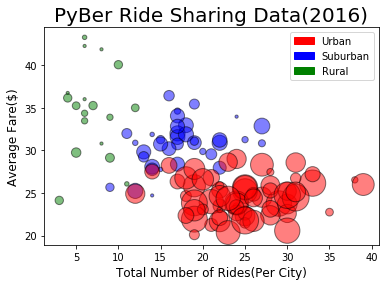

In [42]:
x = complete_data.groupby(['type','city'])['ride_id'].count()
y = complete_data.groupby(['type','city'])['fare'].mean()
z = complete_data.groupby(['type','city'])['driver_count'].mean()
colors = {'Urban':'red', 'Suburban':'blue', 'Rural':'green'}  
recs = [colors[r] for r in x.reset_index()['type']]
plt.scatter(x, y,s=z*10,marker="o",edgecolors="black",alpha=.50,c=recs)

urban_l = plt.Circle([], [], color='red', label='Urban')
suburban_l = plt.Circle([], [], color='blue', label='Suburban')
rural_1 = plt.Circle([], [], color='green', label='Rural')

handles = [urban_l,suburban_l,rural_1]
labels = [h.get_label() for h in handles]
plt.legend(handles=handles,labels=labels)

plt.title('PyBer Ride Sharing Data(2016)', fontsize=20)
plt.xlabel('Total Number of Rides(Per City)', fontsize=12)
plt.ylabel('Average Fare($)', fontsize=12)

plt.show()

([<matplotlib.patches.Wedge at 0x11ac8f630>,
 [Text(1.07491,0.233596,''),
  Text(0.20317,1.08107,''),
  Text(-0.428113,-1.01327,'')])

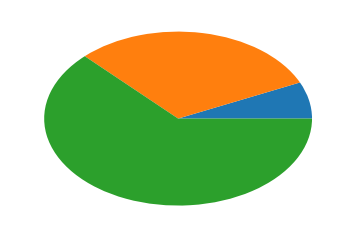

In [56]:
percentage = 100*complete_data.groupby('type')['fare'].sum()/complete_data['fare'].sum()
percentage
plt.pie(percentage)